# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [9]:
import pandas as pd

# 1. Carrega o arquivo 'sinasc_RO_2019.csv'
sinasc = pd.read_csv('sinasc_RO_2019.csv')

# 2. Confirmação
print(f"DataFrame 'sinasc' carregado com sucesso. Linhas: {sinasc.shape[0]}, Colunas: {sinasc.shape[1]}.")
print("\nAs primeiras linhas da base (sinasc.head()):")
print(sinasc.head())

# O PDF 'Estrutura_SINASC_para_CD.pdf' é apenas documentação.

DataFrame 'sinasc' carregado com sucesso. Linhas: 225, Colunas: 1.

As primeiras linhas da base (sinasc.head()):
  ORIGEM;CODESTAB;CODMUNNASC;LOCNASC;IDADEMAE;ESTCIVMAE;ESCMAE;CODOCUPMAE;QTDFILVIVO;QTDFILMORT;CODMUNRES;GESTACAO;GRAVIDEZ;PARTO;CONSULTAS;DTNASC;HORANASC;SEXO;APGAR1;APGAR5;RACACOR;PESO;IDANOMAL;DTCADASTRO;CODANOMAL;NUMEROLOTE;VERSAOSIST;DTRECEBIM;DIFDATA;DTRECORIGA;NATURALMAE;CODMUNNATU;CODUFNATU;ESCMAE2010;SERIESCMAE;DTNASCMAE;RACACORMAE;QTDGESTANT;QTDPARTNOR;QTDPARTCES;IDADEPAI;DTULTMENST;SEMAGESTAC;TPMETESTIM;CONSPRENAT;MESPRENAT;TPAPRESENT;STTRABPART;STCESPARTO;TPNASCASSI;TPFUNCRESP;TPDOCRESP;DTDECLARAC;ESCMAEAGR1;STDNEPIDEM;STDNNOVA;CODPAISRES;TPROBSON;PARIDADE;KOTELCHUCK;CONTADOR
0  1;2589516.0;520140;1;27.0;5.0;4.0;999992.0;0.0...                                                                                                                                                                                                                                               

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

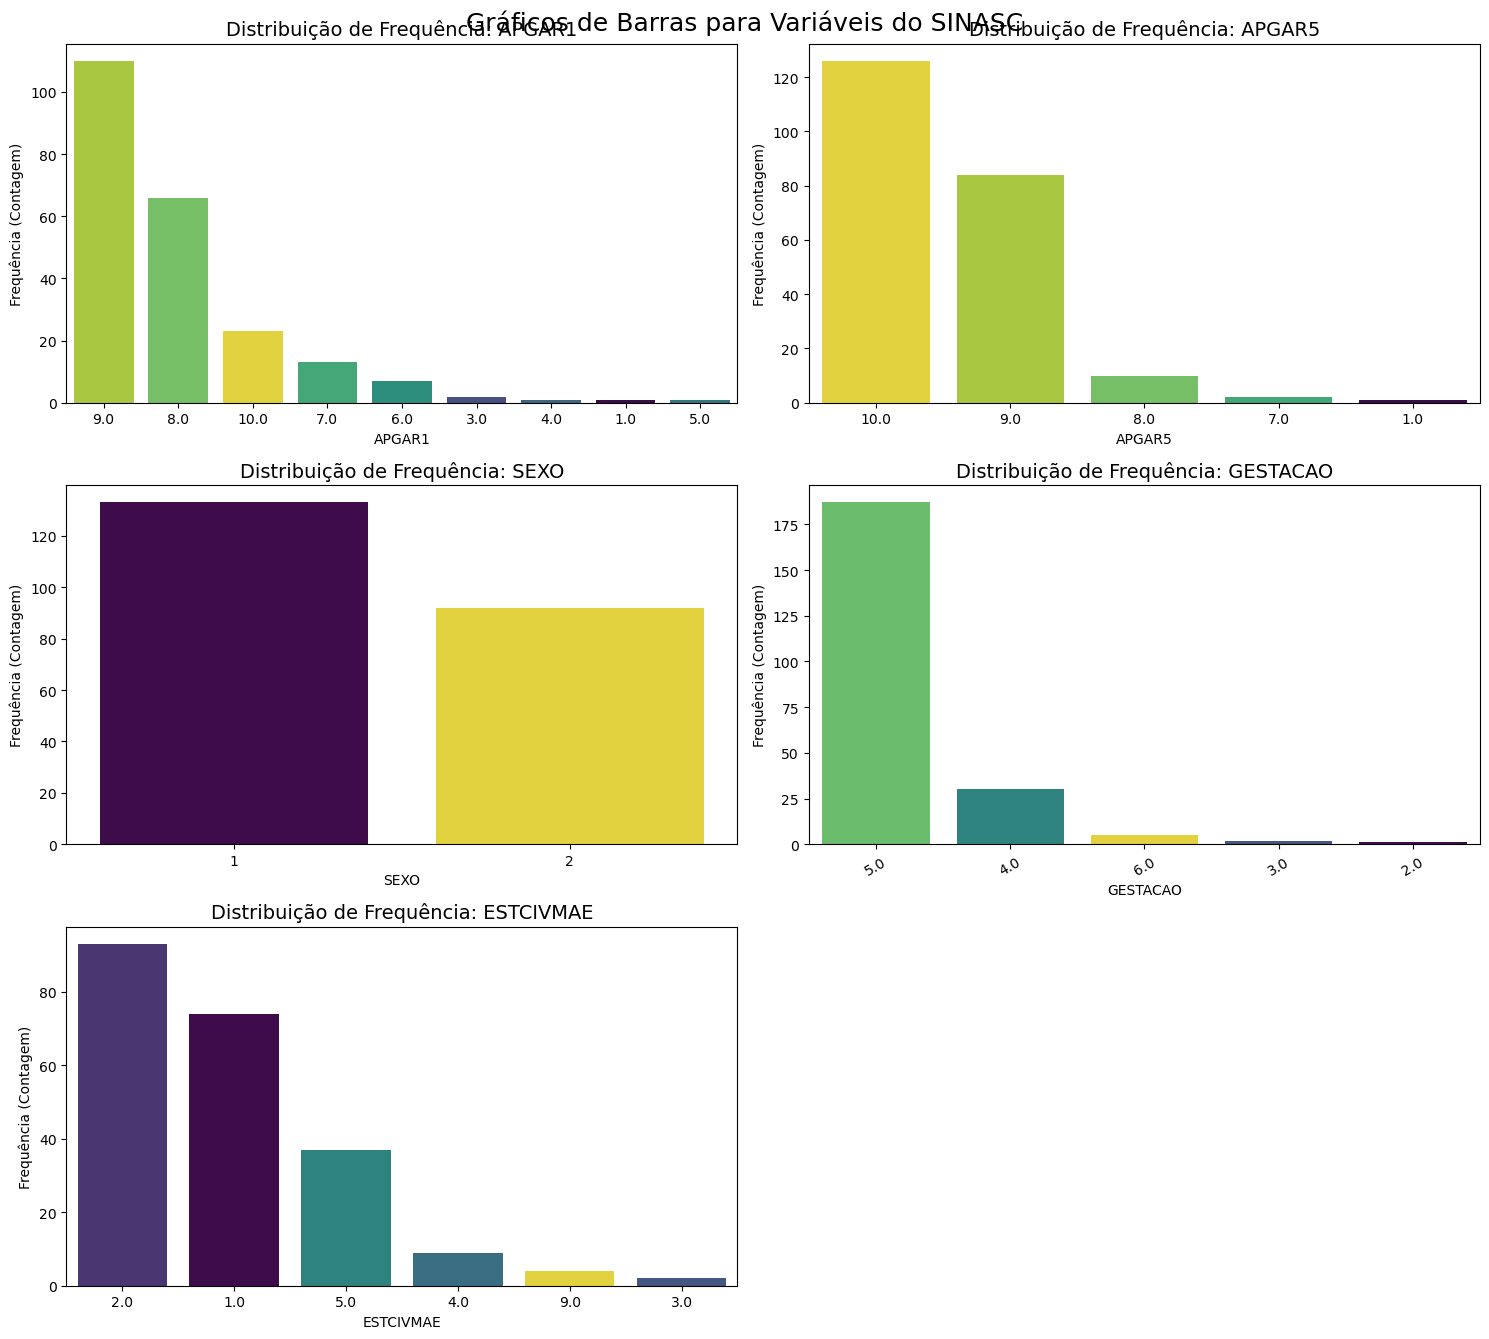

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário de variáveis a serem analisadas
variaveis = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

# 1. Carrega o DataFrame (com o separador correto)
sinasc = pd.read_csv('sinasc_RO_2019.csv', sep=';')

# 2. Configura a figura para o painel de 5 gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4)

# 3. Itera sobre as variáveis e plota o sns.countplot
for i, var in enumerate(variaveis):
    row = i // 2
    col = i % 2
    
    # Plota o gráfico de contagem com a CORREÇÃO:
    # 'hue=var' e 'legend=False' eliminam o FutureWarning
    sns.countplot(
        x=var,
        data=sinasc,
        ax=axes[row, col], 
        hue=var,          # CORREÇÃO 1: Define a variável de cor
        legend=False,     # CORREÇÃO 2: Remove a legenda desnecessária
        palette='viridis', # Opcional: Mantém a paleta de cores
        order=sinasc[var].value_counts().index 
    )
    
    # Configura o título e o rótulo
    axes[row, col].set_title(f'Distribuição de Frequência: {var}', fontsize=14)
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequência (Contagem)')
    
    # Rotação para variáveis com muitos rótulos (como GESTACAO)
    if var in ['GESTACAO']:
        axes[row, col].tick_params(axis='x', rotation=30)

# Remove o sexto eixo vazio
fig.delaxes(axes[2, 1])

plt.suptitle('Gráficos de Barras para Variáveis do SINASC', fontsize=18, y=0.92)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

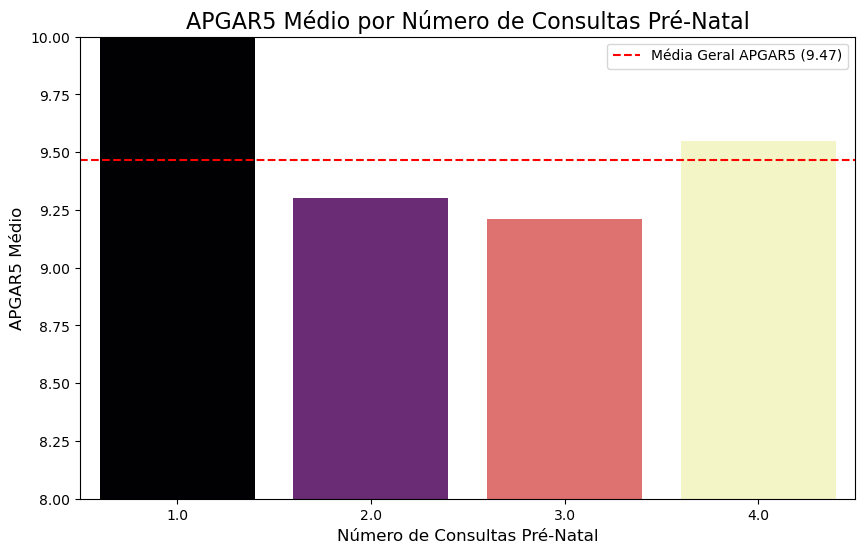

In [15]:
# 1. Agrupamento dos dados: Calcula a média do APGAR5 para cada grupo de CONSULTAS
apgar_por_consulta = sinasc.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

# 2. Configuração do Gráfico de Barras
plt.figure(figsize=(10, 6))

sns.barplot(
    data=apgar_por_consulta,
    x='CONSULTAS',
    y='APGAR5',
    hue='CONSULTAS',     # CORREÇÃO: Define a variável de cor para evitar o FutureWarning
    legend=False,        # CORREÇÃO: Remove a legenda redundante
    palette='magma',     # Paleta de cores para contraste
    # Garante que os números de consultas (0, 1, 2, 3...) fiquem na ordem correta
    order=sorted(apgar_por_consulta['CONSULTAS'].unique()) 
)

# 3. Ajustes de Rótulos e Título
plt.title('APGAR5 Médio por Número de Consultas Pré-Natal', fontsize=16)
plt.xlabel('Número de Consultas Pré-Natal', fontsize=12)
plt.ylabel('APGAR5 Médio', fontsize=12)
plt.ylim(8.0, 10.0) # Ajusta o eixo Y para dar zoom na variação (APGAR5 sempre é alto)

# 4. Linha de Referência (Contextualização)
# Adiciona uma linha horizontal para a média geral do APGAR5
media_geral_apgar5 = sinasc['APGAR5'].mean()
plt.axhline(
    media_geral_apgar5, 
    color='r', 
    linestyle='--', 
    linewidth=1.5, 
    label=f'Média Geral APGAR5 ({media_geral_apgar5:.2f})'
)
plt.legend()

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

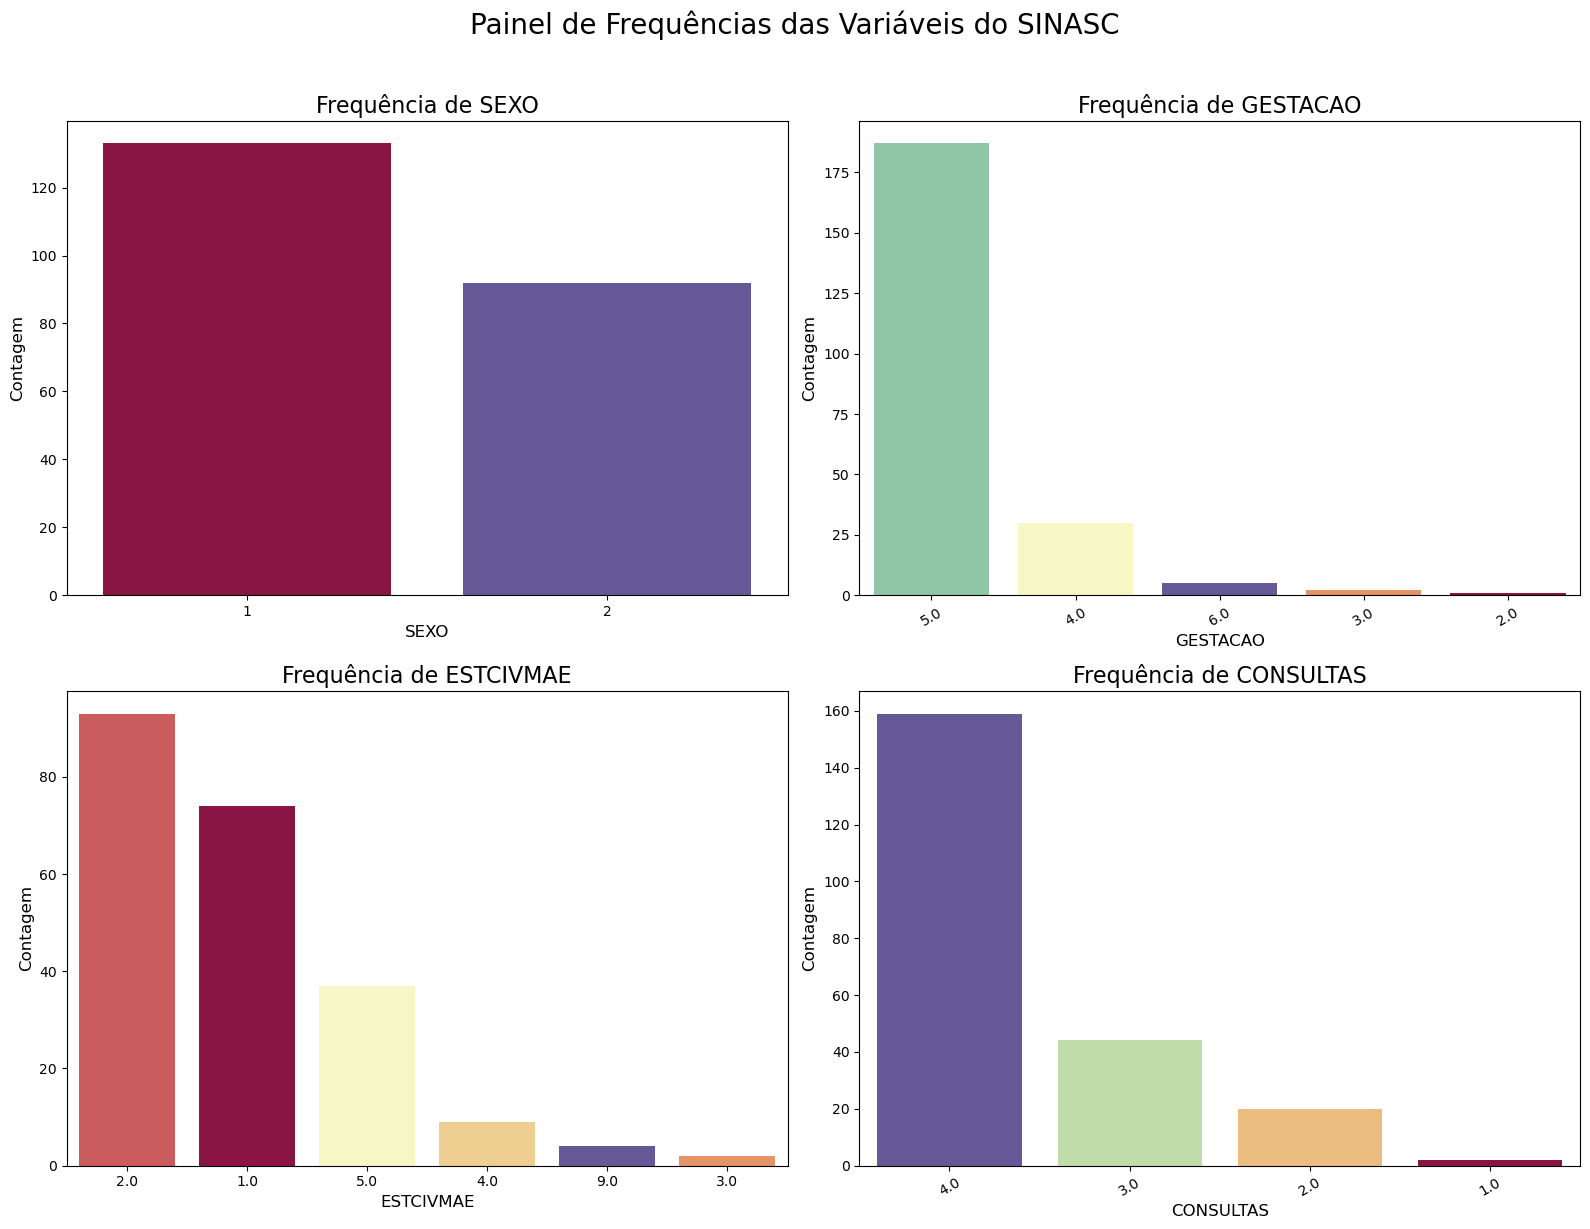

In [16]:
# Lista das 4 variáveis para o painel de frequências
variaveis_q4 = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']

# Carrega o DataFrame com o separador correto (;)
sinasc = pd.read_csv('sinasc_RO_2019.csv', sep=';')

# 1. Configura a figura para o painel 2x2 (4 gráficos)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Ajusta o espaçamento

# 2. Itera sobre as variáveis e plota o sns.countplot em cada eixo
for i, var in enumerate(variaveis_q4):
    # Calcula a posição do subplot (linha e coluna)
    row = i // 2
    col = i % 2
    
    # Plota o gráfico de contagem (sns.countplot)
    sns.countplot(
        x=var,
        data=sinasc,
        ax=axes[row, col], # Direciona para o eixo específico no painel
        hue=var,           # Para evitar o FutureWarning
        legend=False,
        palette='Spectral', # Escolha de paleta diferente para este painel
        # Ordena as barras da mais frequente para a menos frequente
        order=sinasc[var].value_counts().index 
    )
    
    # Configura o título e o rótulo
    axes[row, col].set_title(f'Frequência de {var}', fontsize=16)
    axes[row, col].set_xlabel(var, fontsize=12)
    axes[row, col].set_ylabel('Contagem', fontsize=12)
    
    # Rotação para variáveis com muitos rótulos (melhor prática para GESTACAO e CONSULTAS)
    if var in ['GESTACAO', 'CONSULTAS']:
        axes[row, col].tick_params(axis='x', rotation=30)

plt.suptitle('Painel de Frequências das Variáveis do SINASC', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()